# Análise Exploratória de Dados (EDA)
**Hackathon de Análise de Dados e Machine Learning**  
Professor: Howard Cruz  
Alunos: Eve Chalab, Wilton Oliveira, Yasmin Neumman, Yasmin Souza

---

## Objetivo
Analisar as distribuições das variáveis, verificar valores nulos, outliers, correlações com a variável alvo e preparar o dataset para a modelagem.

---

## Etapas
- Leitura dos dados
- Análise de valores ausentes
- Estatísticas descritivas
- Correlações com `SalePrice`
- Gráficos e insights visuais


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("muted")
%matplotlib inline


In [17]:
# Caminho relativo se estiver dentro da pasta notebooks/
df = pd.read_csv("../Dataset/train.csv")
df.shape, df.columns[:5]  # Exibe quantidade de linhas e algumas colunas iniciais


((1460, 81),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea'], dtype='object'))

In [18]:
# Primeiras entradas
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

pd.DataFrame({
    "Total Missing": missing,
    "% Missing": missing_percent.round(2)
})


,Total Missing,% Missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [20]:
df.describe().T.sort_values("std", ascending=False).head(10)


,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.00,0.0,0.00,15500.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


In [21]:
correlation = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
correlation.head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

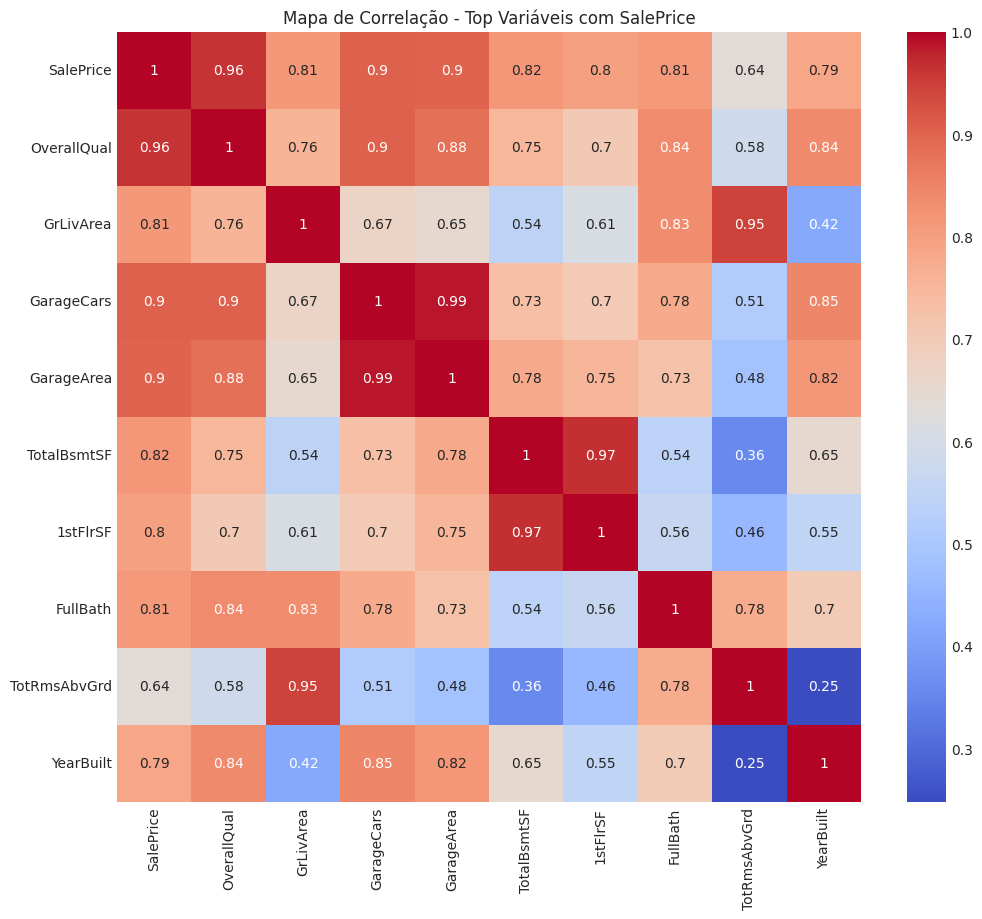

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True)[correlation.head(10).index].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação - Top Variáveis com SalePrice")
plt.show()


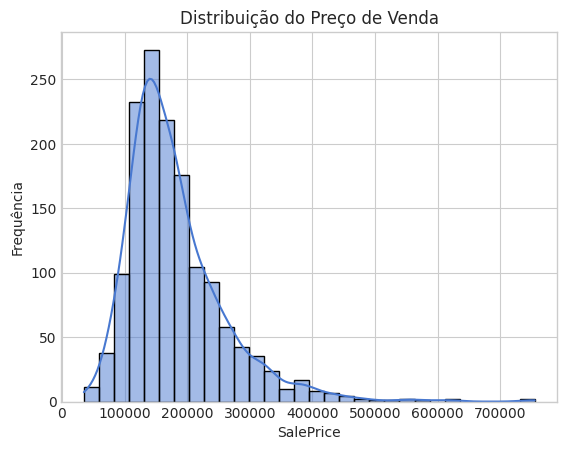

In [23]:
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribuição do Preço de Venda")
plt.xlabel("SalePrice")
plt.ylabel("Frequência")
plt.show()


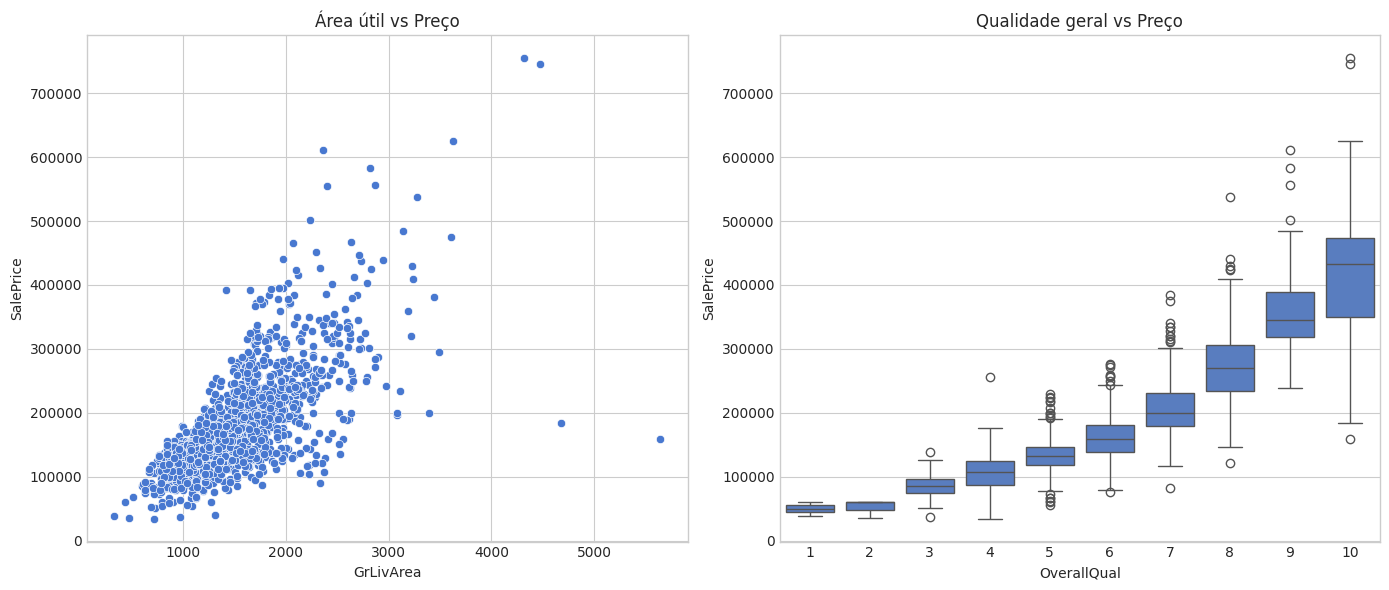

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", ax=ax[0])
sns.boxplot(data=df, x="OverallQual", y="SalePrice", ax=ax[1])
ax[0].set_title("Área útil vs Preço")
ax[1].set_title("Qualidade geral vs Preço")
plt.tight_layout()
plt.show()


In [25]:
# Selecionar variáveis categóricas
cat_cols = df.select_dtypes(include=["object"]).columns

# Ver impacto no preço médio
cat_price = {}
for col in cat_cols:
    if df[col].nunique() < 20:  # Evita colunas com muitos valores únicos
        cat_price[col] = df.groupby(col)["SalePrice"].mean().sort_values(ascending=False)

# Exibir os mais relevantes
for col, data in cat_price.items():
    print(f"\nMédia de SalePrice por categoria: {col}")
    print(data)



Média de SalePrice por categoria: MSZoning
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

Média de SalePrice por categoria: Street
Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64

Média de SalePrice por categoria: Alley
Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64

Média de SalePrice por categoria: LotShape
LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64

Média de SalePrice por categoria: LandContour
LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64

Média de SalePrice por categoria: Utilities
Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

Média de SalePrice por categoria: LotConfig
LotConfig
CulDSac   

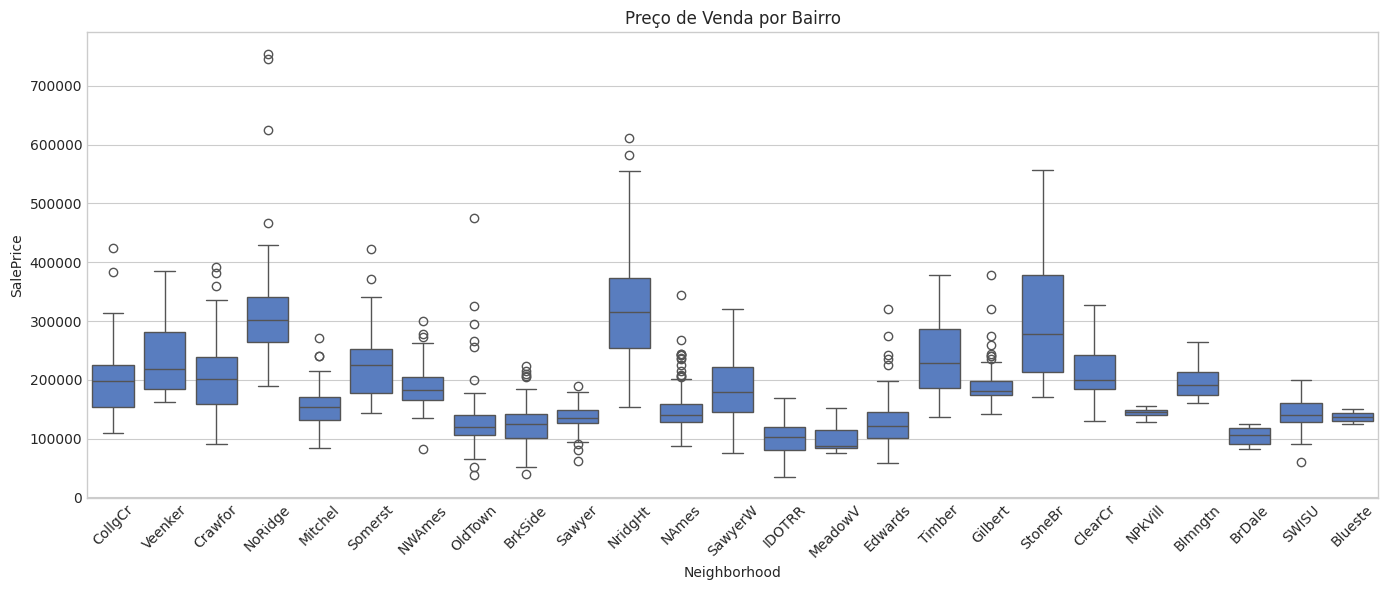

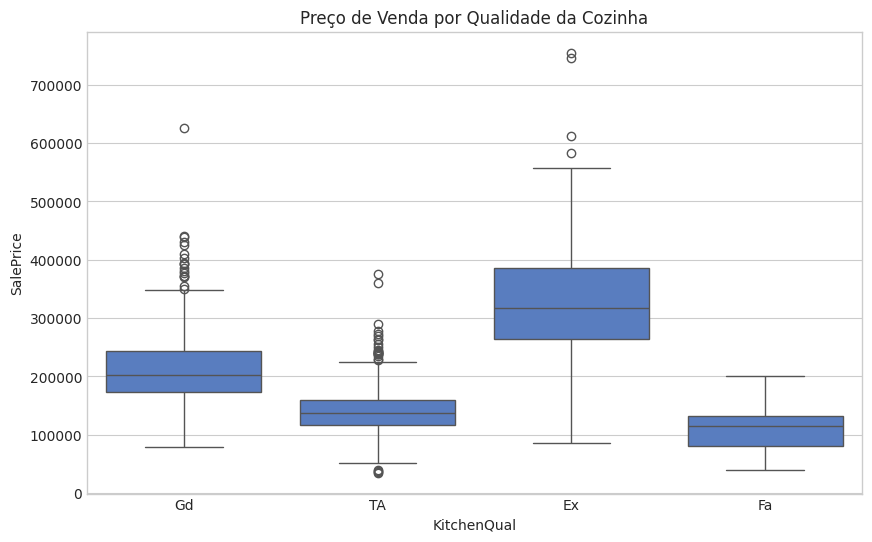

In [26]:
# Exemplo com Neighborhood e OverallQual
plt.figure(figsize=(14, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.title("Preço de Venda por Bairro")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="KitchenQual", y="SalePrice", data=df)
plt.title("Preço de Venda por Qualidade da Cozinha")
plt.show()


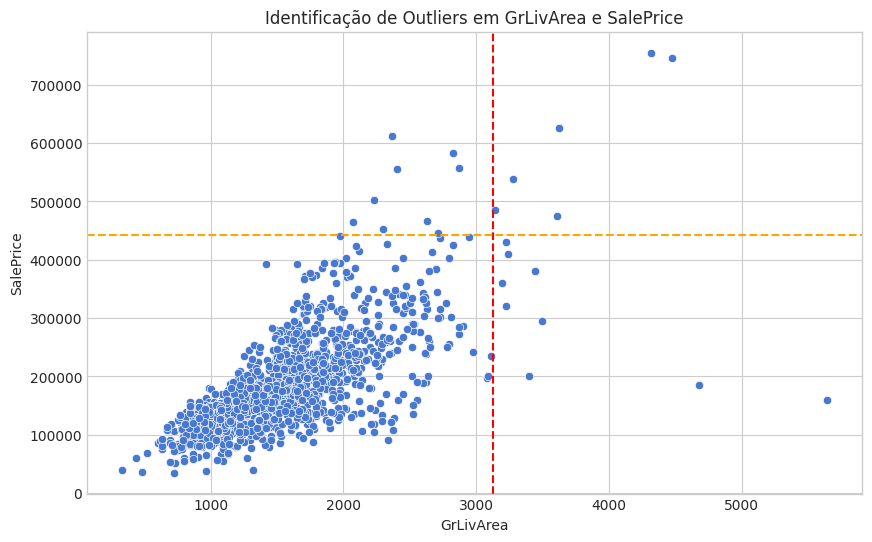

In [27]:
# Scatter para verificar outliers em GrLivArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.axvline(df["GrLivArea"].quantile(0.99), color="red", linestyle="--")
plt.axhline(df["SalePrice"].quantile(0.99), color="orange", linestyle="--")
plt.title("Identificação de Outliers em GrLivArea e SalePrice")
plt.show()


In [28]:
# Remover outliers extremos com base em GrLivArea > 4500 e SalePrice > 700000 (exemplos)
df_clean = df[(df["GrLivArea"] < 4500) & (df["SalePrice"] < 700000)].copy()
print(f"Shape antes: {df.shape}, depois da limpeza: {df_clean.shape}")


Shape antes: (1460, 81), depois da limpeza: (1456, 81)


In [29]:
# Salvar dataset limpo para os próximos notebooks
df_clean.to_csv("../Dataset/train_clean.csv", index=False)
